In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Define the column names
#on definie les noms des colonnes
colnames = ["sepal_length_in_cm", "sepal_width_in_cm", "petal_length_in_cm", "petal_width_in_cm", "class"]


In [ ]:
# Load the Iris dataset from the URL
#on telecharge  la base , pas besoin de fichier csv pour iris
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=colnames)

In [ ]:
# Encode the class labels
"ici on remplacce les valeurs de la colnne class ici setosa....par 1,2,3"
dataset = dataset.replace({"class": {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11908\4166129578.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"class": {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}})


In [14]:
#iloc est une methode pandas pour la selecton par rapport aux positions
X = dataset.iloc[:,:-1].values#ici sa selectionne toutes les lignes toutes les colonnes sauf la derniere
y = dataset.iloc[:, -1].values
#ici toutes les lignes et uniquement la derniere colonne

#la fonction split divise les données en deux parties entrainement et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#le test size signifie que 25% des données iront aux tests et 75%  l'entrainement

#en résumé on extrait les carasteristiques des classes et on divise les données

In [ ]:
X_vis = dataset[["petal_length_in_cm", "petal_width_in_cm"]].values
y_vis = dataset["class"].values

#xvis et yvis represente les caracteristiques specifiques pour la visualistation
#et le .values covertit en un tableau numpy

In [ ]:
# Scale the features
#Scikit-learn qui permet de standardiser les données, c'est-à-dire de les transformer pour qu'elles aient une
# moyenne de 0 et un écart-type de 1. Cela est particulièrement utile lorsque les caractéristiques ont des échelles différentes

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [15]:
# Initialize and train the SVM model with a linear kernel
#kernel: noyau lineaire
svm_model = SVC(kernel='linear', random_state=42)
#le random state s'assure que le modele produira les memes resultats meme
#si on  l'entraine plusieurs fois
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [9]:
# Make predictions on the test set

y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
#accuracy compare la prediction et le test
accuracy = accuracy_score(y_test, y_pred)
#om multiplie par 100 pour avoir en pourcentage et 2f pour avoir 2 decimal
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.37%


In [ ]:
# Classification report

print(classification_report(y_test, y_pred))
#classe precision, nombre de prediction correcte faite par la classe
#accuracy c'est le nbre de preduction correcte donc 97% sont correctement classées dans la zone de test
#en d'autres thermesparmis les 38 obsvervations donc support 97% ont etes coorectement classeés par le svm

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
#ici on affihe la matrice de confusion, pour evaluer les performances d'un modele de classification
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
#ici on utilse une validation croisé en divisant en plusieurs sous ensemble
accuracies = cross_val_score(estimator = svm_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


<Axes: >

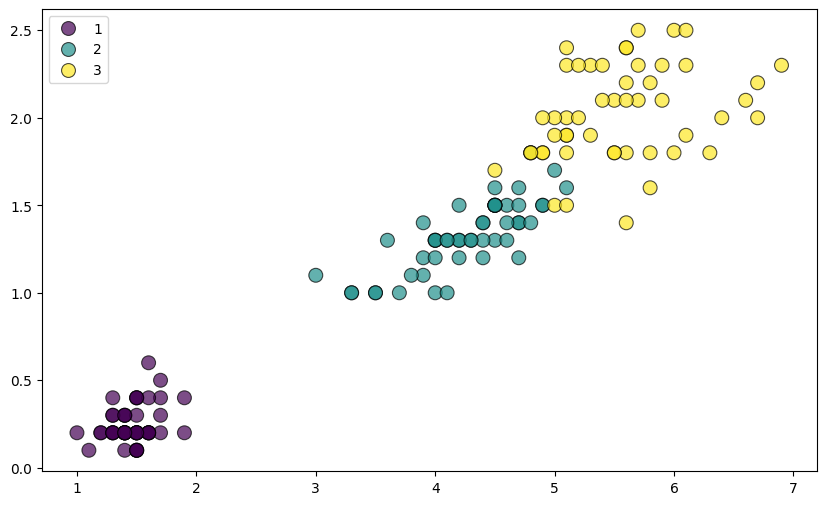

In [18]:
# Plotting the decision boundary
plt.figure(figsize=(10, 6))
#surface de decision, separation entre differentes classes
#z prediction de modele indique  à quelle classe chaque point de la grille appartient
#plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis, palette="viridis", s=100, edgecolor="k", alpha=0.7)

In [19]:
# SVM with polynomial kernel

svm_poly = SVC(kernel='poly', degree=3, random_state=42)

svm_poly.fit(X_train, y_train)

y_pred_poly = svm_poly.predict(X_test)

print(f'Polynomial Kernel Accuracy: {accuracy_score(y_test, y_pred_poly) * 100:.2f}%')


Polynomial Kernel Accuracy: 97.37%


In [29]:
# SVM with RBF kernel

svm_rbf = SVC(kernel='rbf', random_state=42)

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print(f'RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf) * 100:.2f}%')

RBF Kernel Accuracy: 97.37%
